# Proyecto #6 - Corriendo Aggregates Sobre un DataSet con 3.000 Registros de Visitas a un Sitio Web

Vamos a trabajar con el archivo de csv llamado `visits.csv` que contiene mas de 3.000 filas, importemoslo en un dataframe de pandas y en una variable llamada `user_visits`

In [1]:
import pandas as pd
user_visits = pd.read_csv('datasets/page_visits.csv')
user_visits.head()

,id,first_name,last_name,email,month,utm_source
0,10043,Louis,Koch,LouisKoch43@gmail.com,3 - March,yahoo
1,10150,Bruce,Webb,BruceWebb44@outlook.com,3 - March,twitter
2,10155,Nicholas,Hoffman,Nicholas.Hoffman@gmail.com,2 - February,google
3,10178,William,Key,William.Key@outlook.com,3 - March,yahoo
4,10208,Karen,Bass,KB4971@gmail.com,2 - February,google


La columna `utm_source` contiene informacion acerca de como los usuarios estan llegando a la pagina web. Por ejemplo `utm_source` = `Facebook` quiere decir que el usuario hizo click en una publicdad nuestra en Facebook. 

Use un `groupby` para calcular cuantas visitas han venido de cada una de las fuentes de trafico. Guardelo en una variable llamada: `click_source`. Recuerde el `reset_index()`

In [3]:
click_source = user_visits.groupby('utm_source').id.count().reset_index()
click_source

,utm_source,id
0,email,462
1,facebook,823
2,google,543
3,twitter,415
4,yahoo,757


Nuestro departamento de marketing cree que el trafico al sitio ha venido cambiando en los utlimos meses. use un `groupby` para calcular el numero de visitas a nuestro sitio por cada `utm_source` por cada `month`. Guarde su respuesta en una variable llamada: `click_source_by_month` e imprimala

In [4]:
click_source_by_month = user_visits.groupby(['utm_source', 'month']).id.count().reset_index()
click_source_by_month

,utm_source,month,id
0,email,1 - January,43
1,email,2 - February,147
2,email,3 - March,272
3,facebook,1 - January,404
4,facebook,2 - February,263
5,facebook,3 - March,156
6,google,1 - January,127
7,google,2 - February,196
8,google,3 - March,220
9,twitter,1 - January,164


El jefe de marketing dice que esta tabla es dificil de leer. use un `pivot` para creat un pivot table donde las filas (rows) son `utm_source` y las columnas son los meses `month`. Guarde sus resultados en la variable: `click_source_by_month_pivot` e imprimala. debe lucir de esta forma

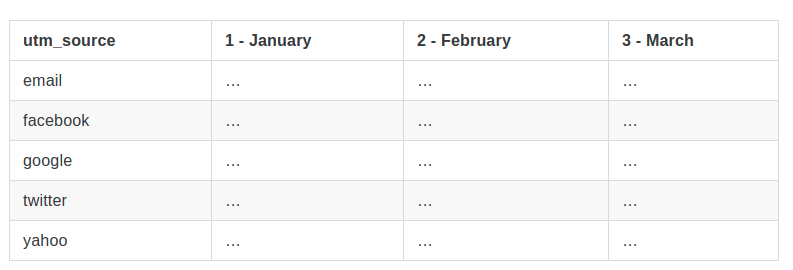

In [5]:
click_source_by_month_pivot = click_source_by_month.pivot(
    columns = 'month',
    index = 'utm_source',
    values = 'id').reset_index()
click_source_by_month_pivot

month,utm_source,1 - January,2 - February,3 - March
0,email,43,147,272
1,facebook,404,263,156
2,google,127,196,220
3,twitter,164,154,97
4,yahoo,262,240,255
